[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


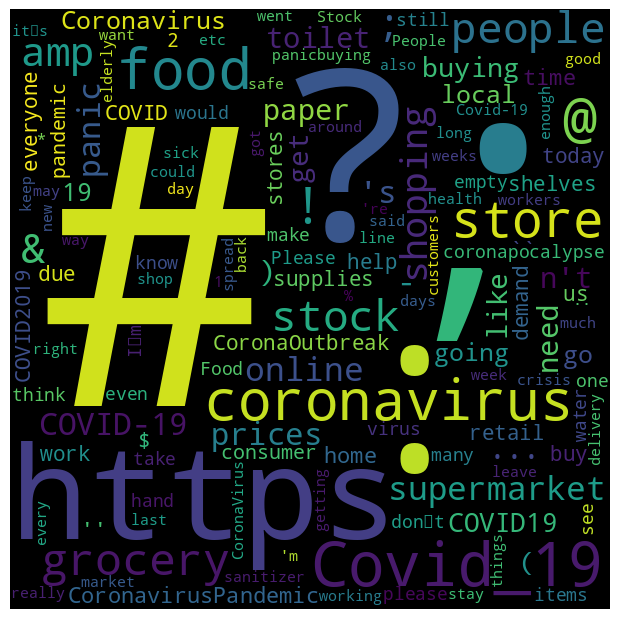

In [7]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import nltk

# Download the punkt tokenizer
nltk.download('punkt')

# Load the CSV file into a pandas dataframe
tweets = pd.read_csv("Corona_NLP_test.csv")

# Convert the text data into tokens
tokens = tweets['OriginalTweet'].apply(word_tokenize)

# Remove stop words
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
tokens_sw_removed = tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Count word frequencies
word_freq = pd.Series(np.concatenate(tokens_sw_removed)).value_counts()

# Create word cloud
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
